In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from pm4py.evaluation.replay_fitness import factory as replay_factory
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.visualization.dfg import factory as dfg_vis_factory
from pm4py.objects.conversion.log import factory as conversion_factory

#### Подготовка данных

In [4]:
df = pd.read_csv("Team 1.csv")

df["event time:timestamp"] = df["event time:timestamp"].apply(lambda x: pd.Timestamp(x))

df = df.rename(columns={"case concept:name": "case:concept:name",
                   "event concept:name": "concept:name",
                   "event time:timestamp": "time:timestamp"});

df = df[["case:concept:name","concept:name","time:timestamp"]]

df = df.sort_values(by=["case:concept:name", "time:timestamp"])

In [5]:
event_log = conversion_factory.apply(df)

#### DFG

In [6]:
dfg = dfg_factory.apply(event_log)

#### Рисуем

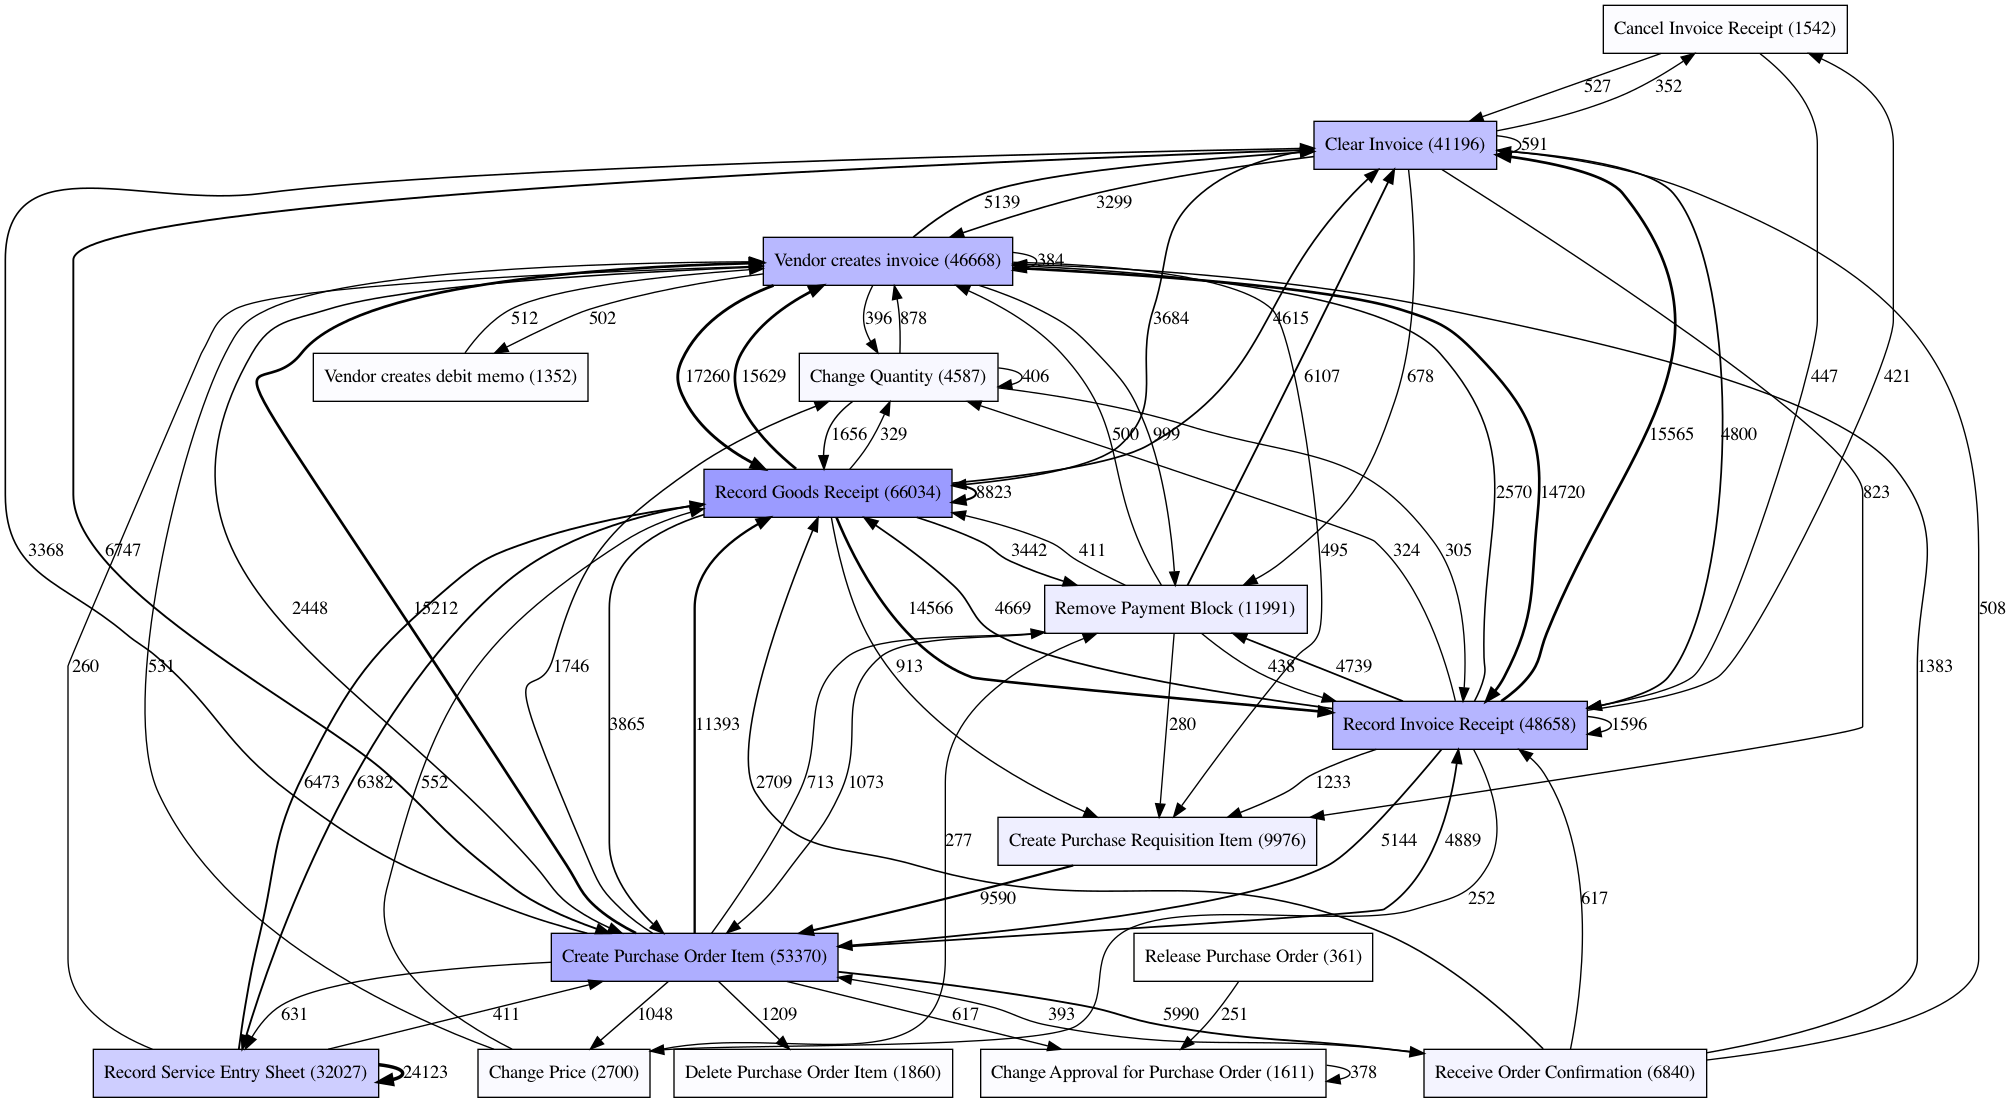

In [7]:
gviz = dfg_vis_factory.apply(dfg, log=event_log, variant="frequency")
dfg_vis_factory.view(gviz)

### Alpha Петри

In [ ]:
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.objects.petri.reachability_graph import construct_reachability_graph
from pm4py.visualization.transition_system import factory as ts_vis_factory

In [8]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)

In [ ]:
reachab_graph = construct_reachability_graph(net, initial_marking)

#### Рисуем грф

In [ ]:
viz = ts_vis_factory.apply(reachab_graph, parameters={"show_labels": True, "show_names": False})
ts_vis_factory.view(viz)